In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load all the csv_files into a list
csv_files = [os.path.join("./Neuron Data", f) for f in os.listdir("./Neuron Data")]

In [4]:
# Make a test histogram for the first file
df = pd.read_csv(csv_files[0])

# % 0= Rat number
# % 1= Unit (cell) number (not important)
# % 2= Trial number (1-100)
# % 3= Trial type (DS-= 0; DS+= 1)
# % 4= Behavior (no lever press= 0; lever press= 1)
# % 5-104= normalized (z-score) neuronal activity (100 bins of 50 ms per bin)

# split df into DS- and DS+

ds_minus = df[df.iloc[:, 3] == 0]
ds_plus = df[df.iloc[:, 3] == 1]



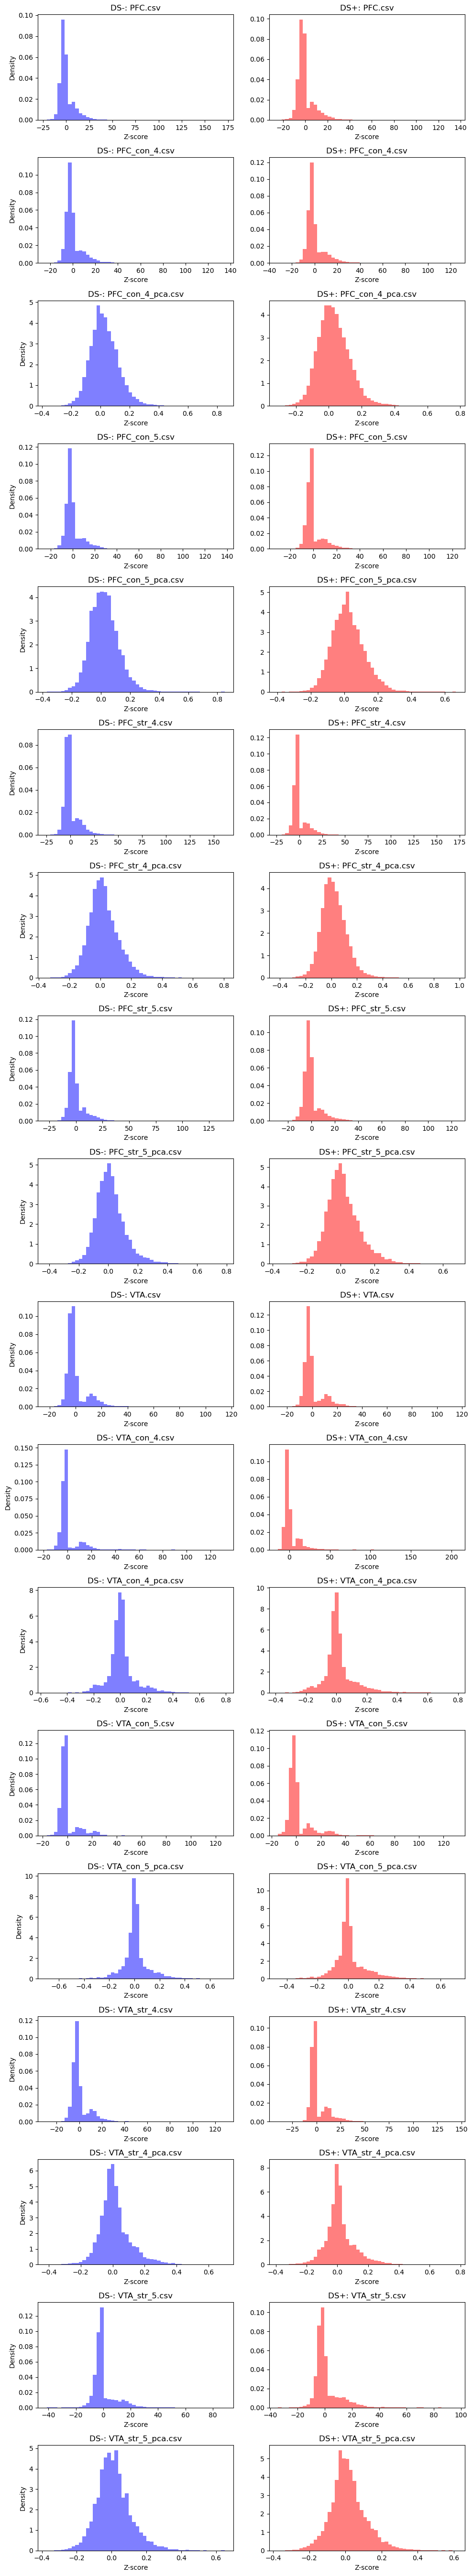

In [5]:
fig, axes = plt.subplots(len(csv_files), 2, figsize=(10, len(csv_files) * 3))

# Process each file
for i, file in enumerate(csv_files):
    df = pd.read_csv(file, header=None)  # Assuming no headers in CSV

    # Split into DS- and DS+
    ds_minus = df[df.iloc[:, 3] == 0].iloc[:, 5:105].to_numpy().flatten()  # Extract z-score columns
    ds_plus = df[df.iloc[:, 3] == 1].iloc[:, 5:105].to_numpy().flatten()

    # Plot histograms for this file
    axes[i, 0].hist(ds_minus, bins=50, alpha=0.5, color="blue", density=True)
    axes[i, 0].set_title(f"DS-: {os.path.basename(file)}")
    axes[i, 0].set_xlabel("Z-score")
    axes[i, 0].set_ylabel("Density")

    axes[i, 1].hist(ds_plus, bins=50, alpha=0.5, color="red", density=True)
    axes[i, 1].set_title(f"DS+: {os.path.basename(file)}")
    axes[i, 1].set_xlabel("Z-score")

plt.tight_layout()
plt.show()

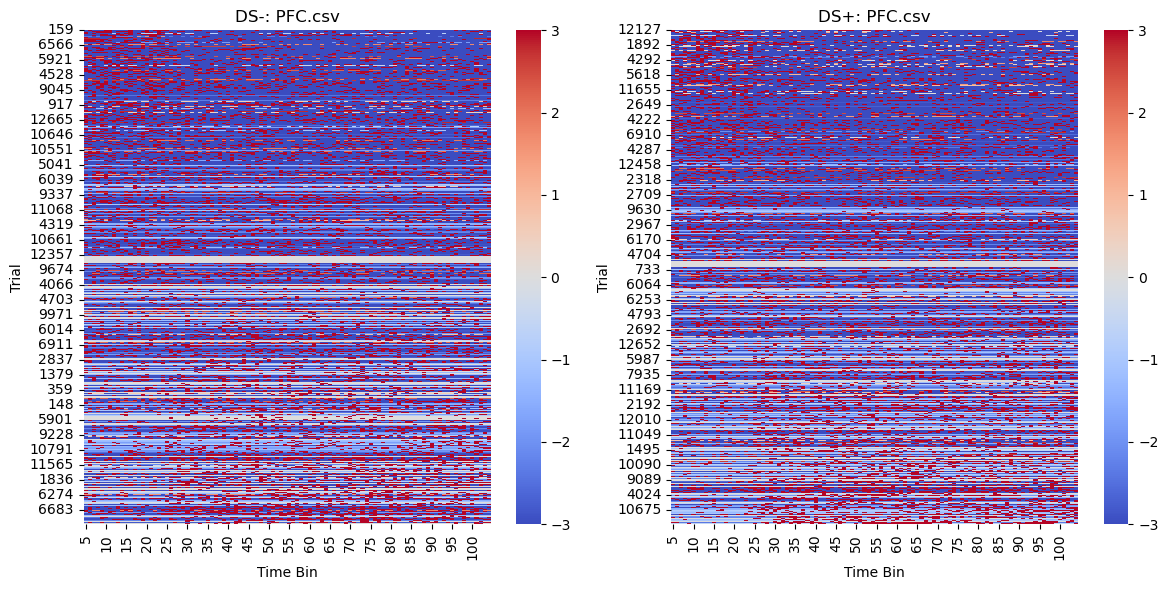

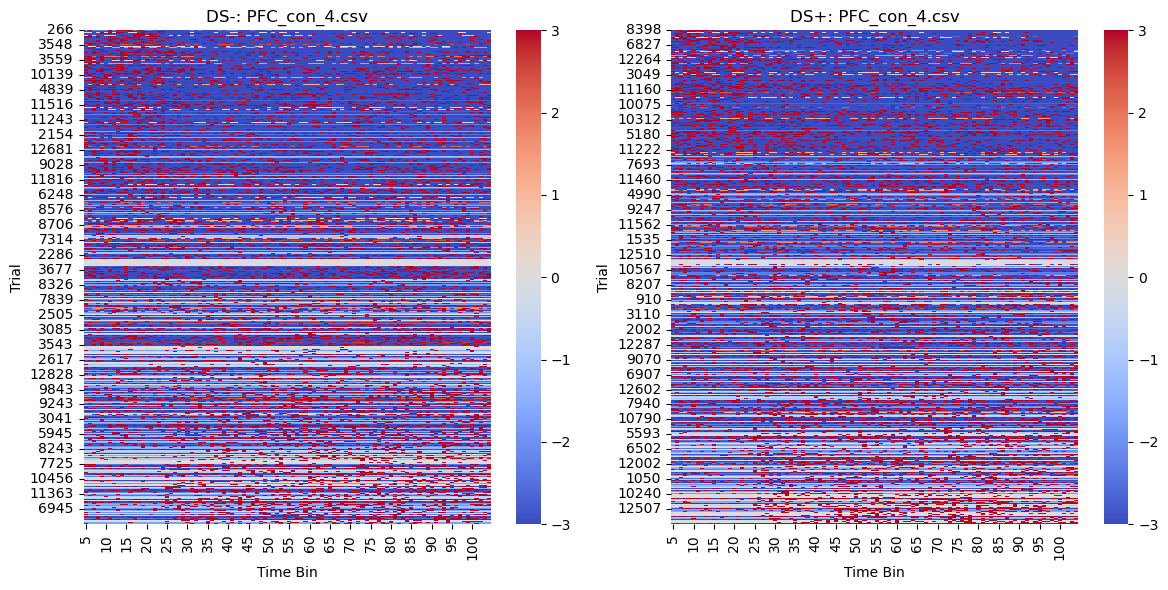

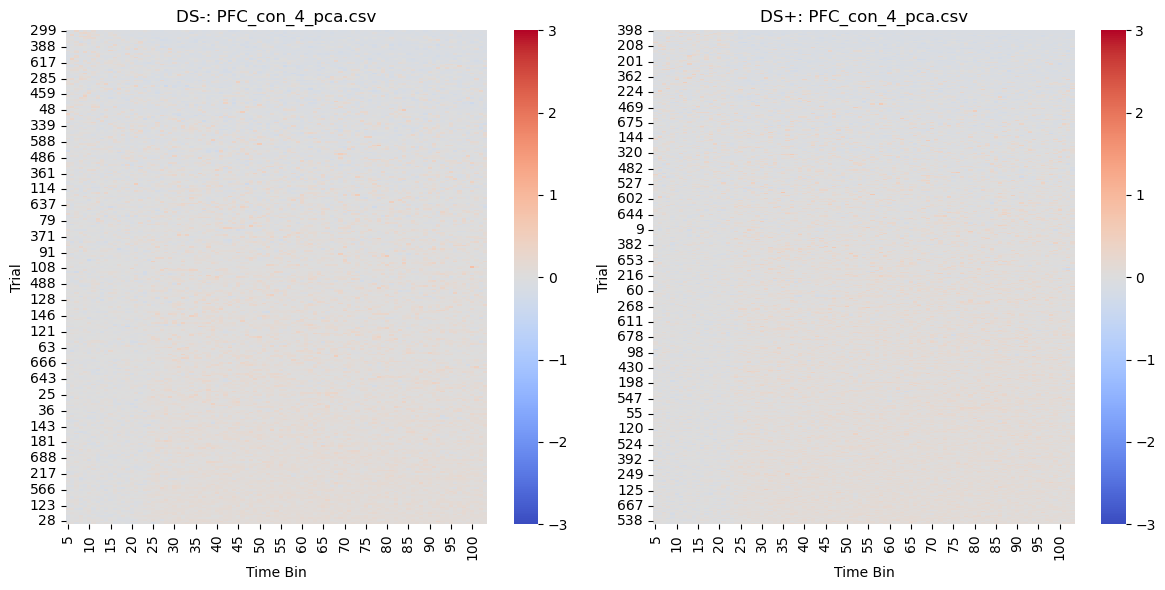

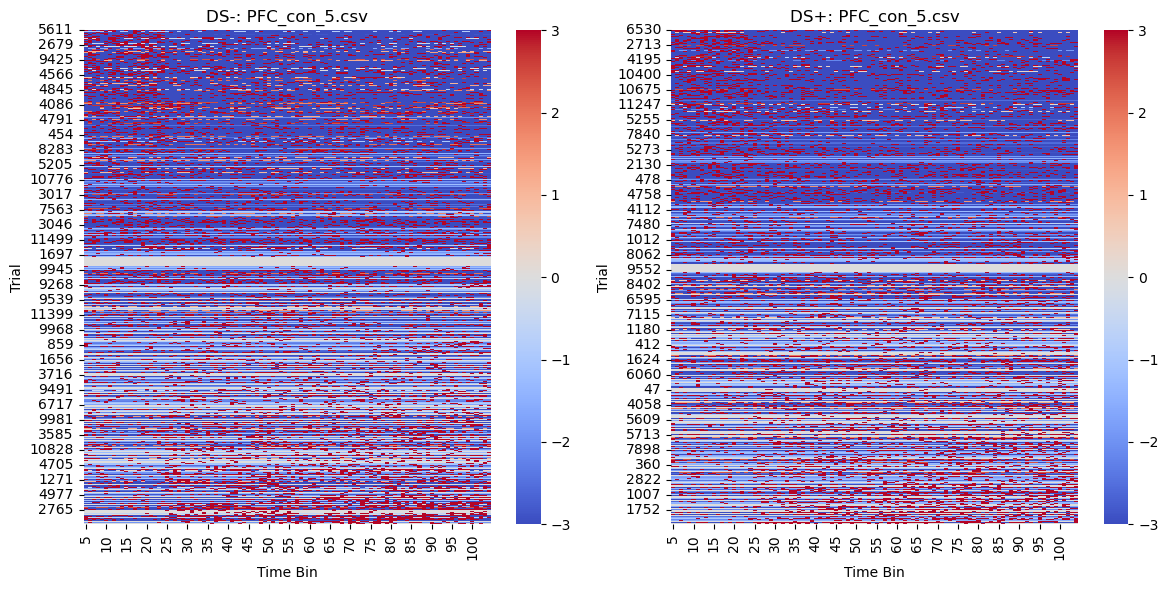

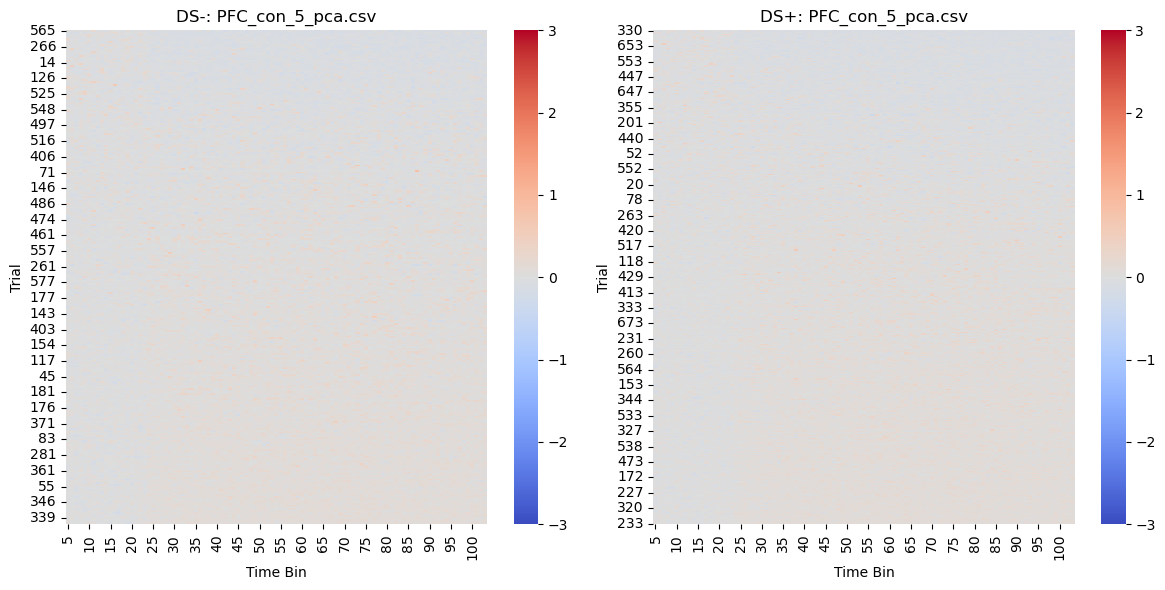

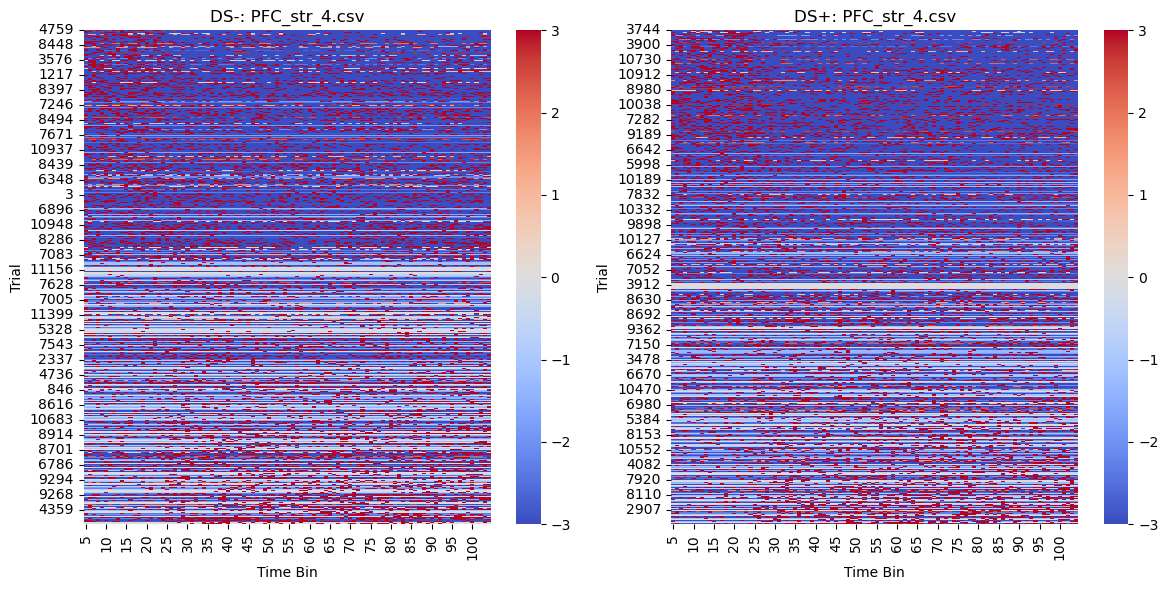

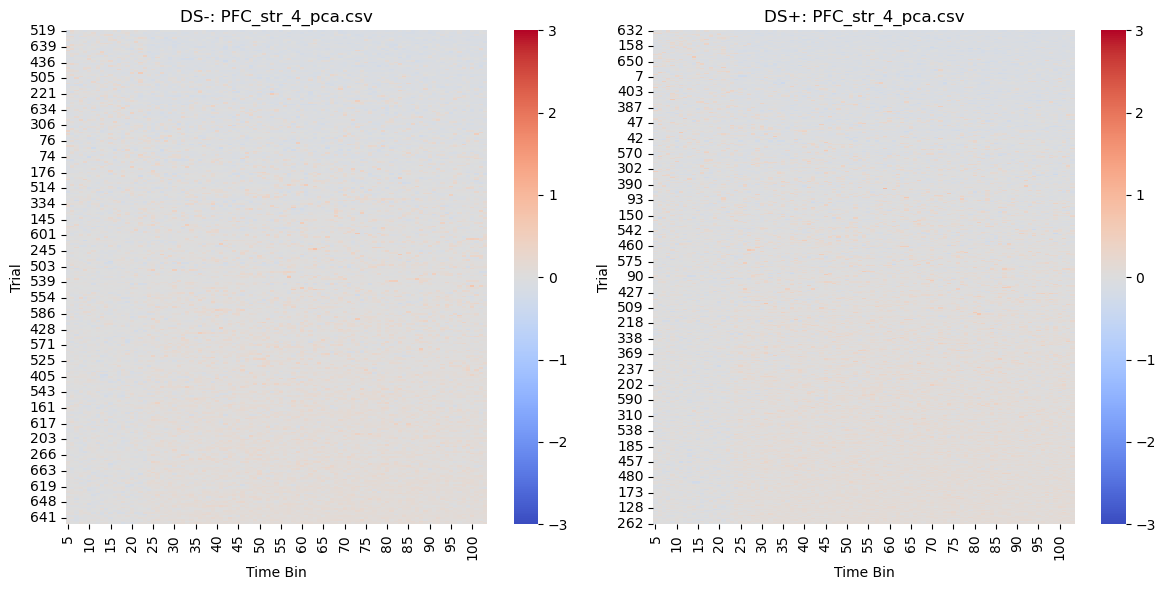

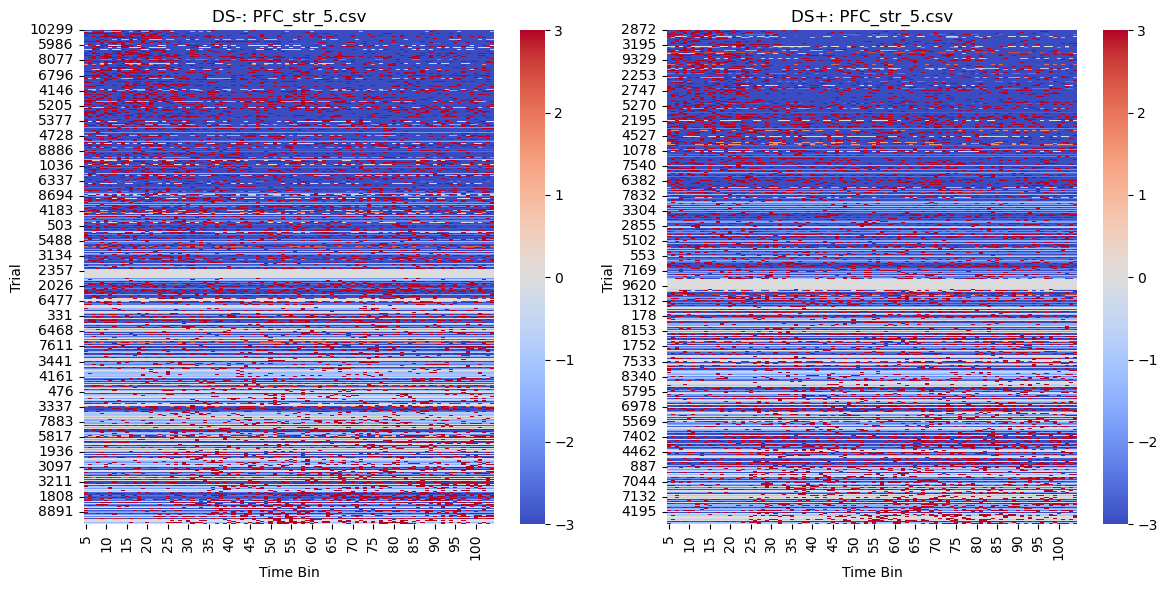

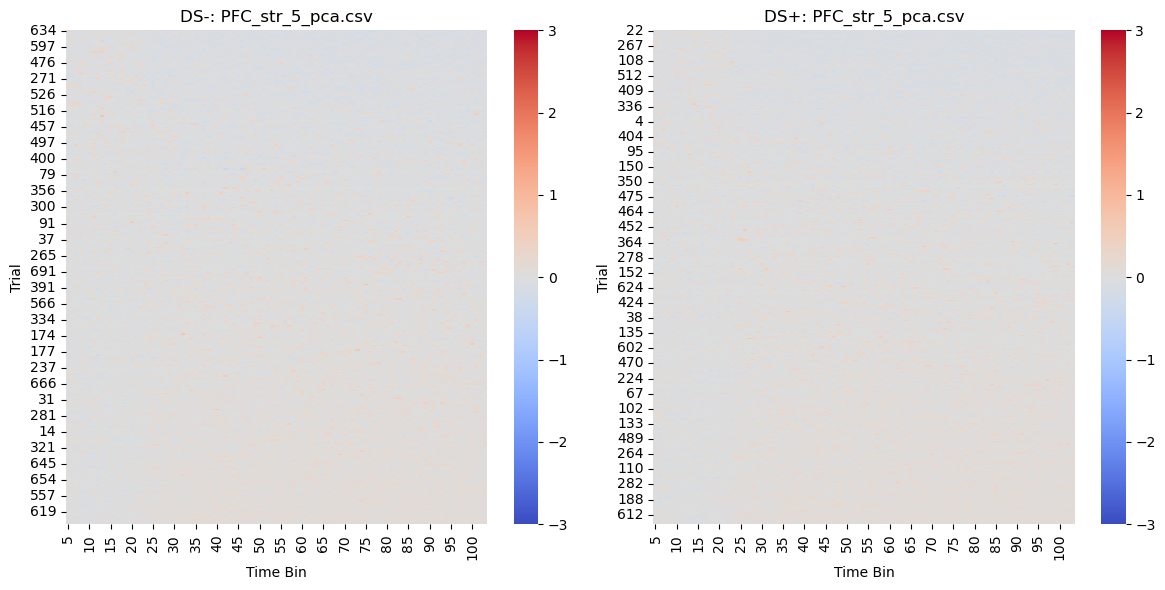

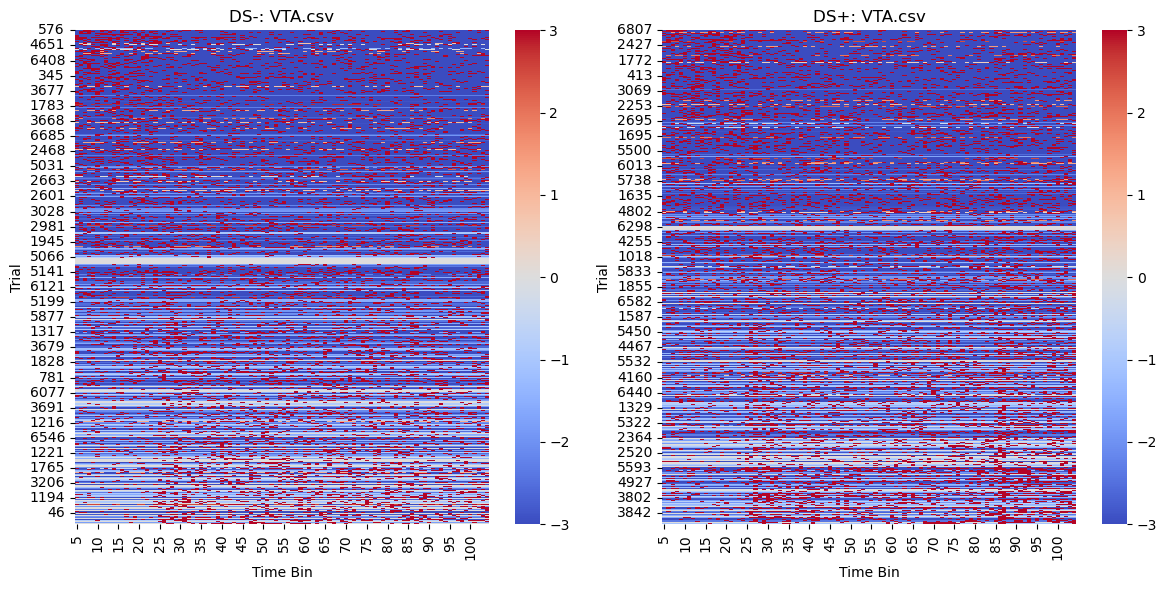

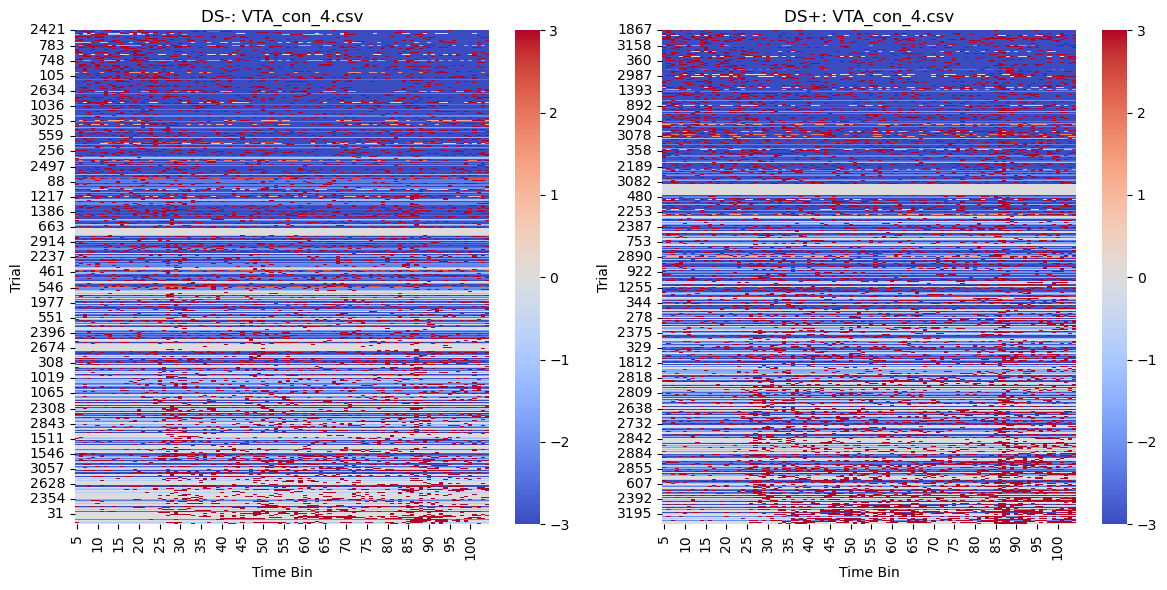

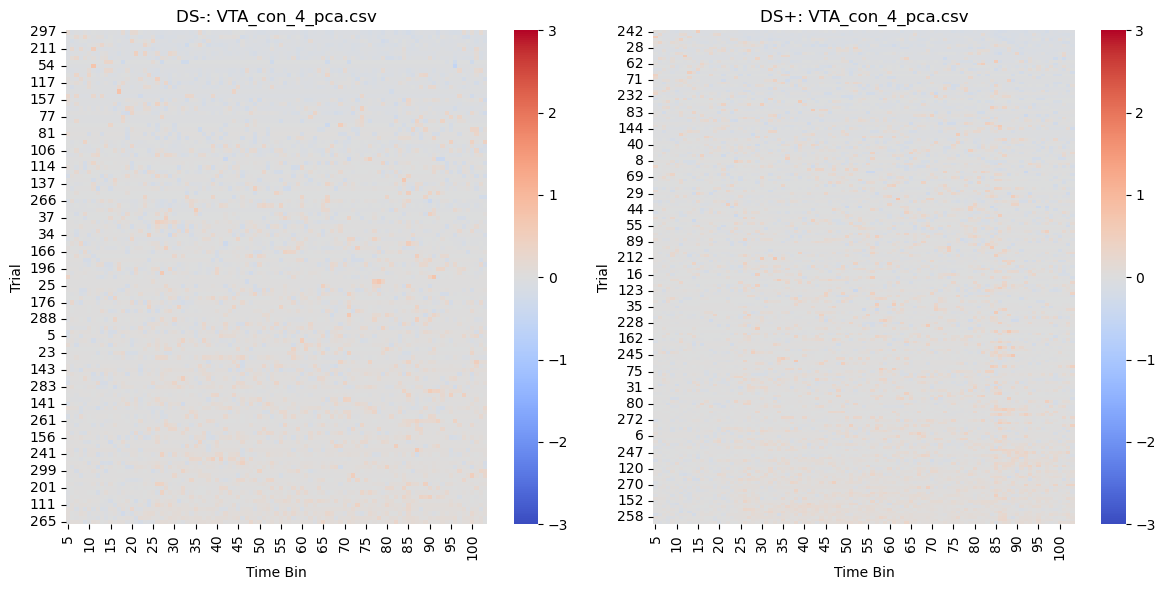

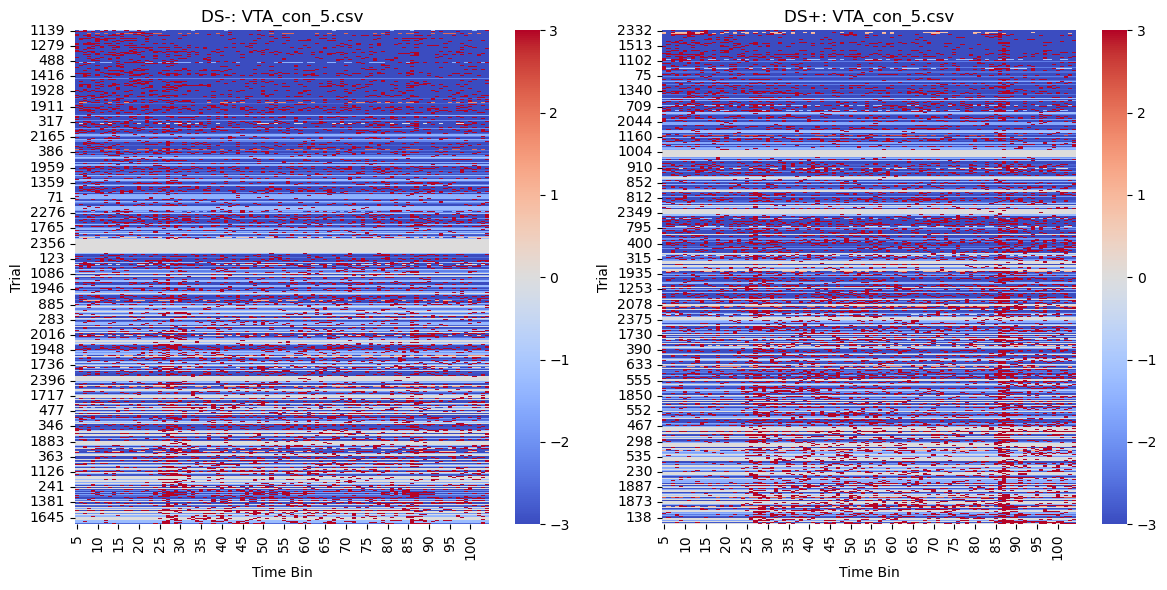

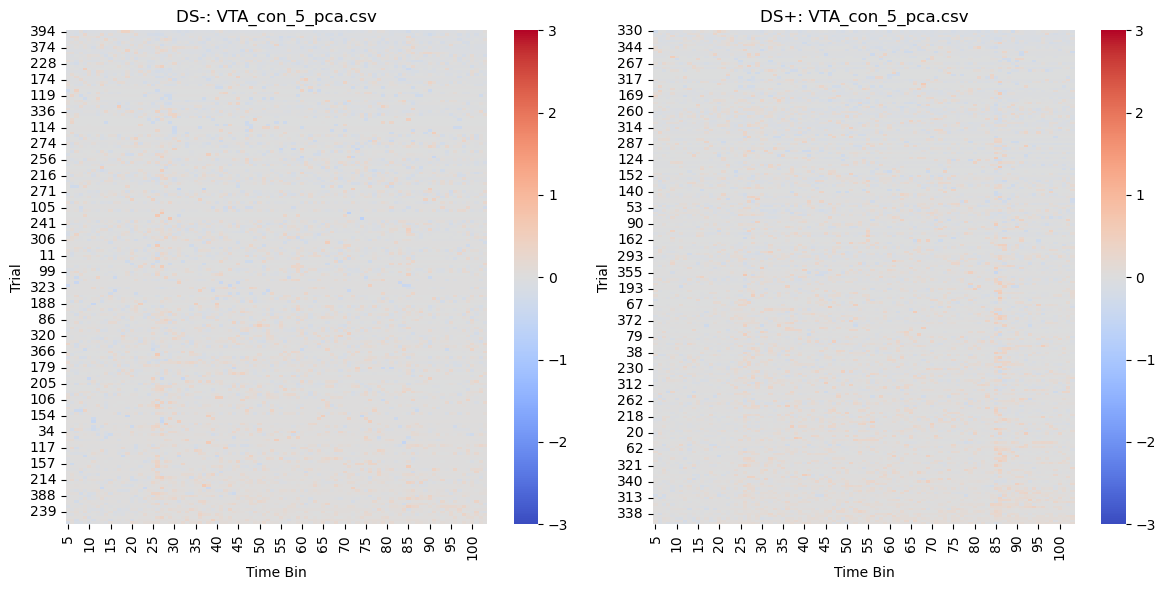

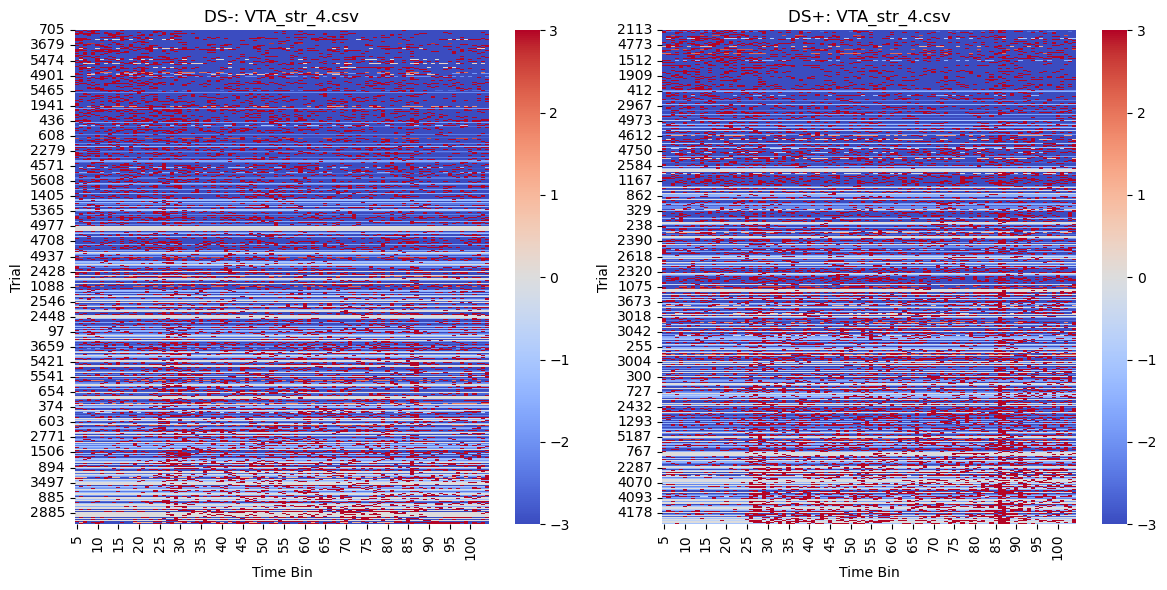

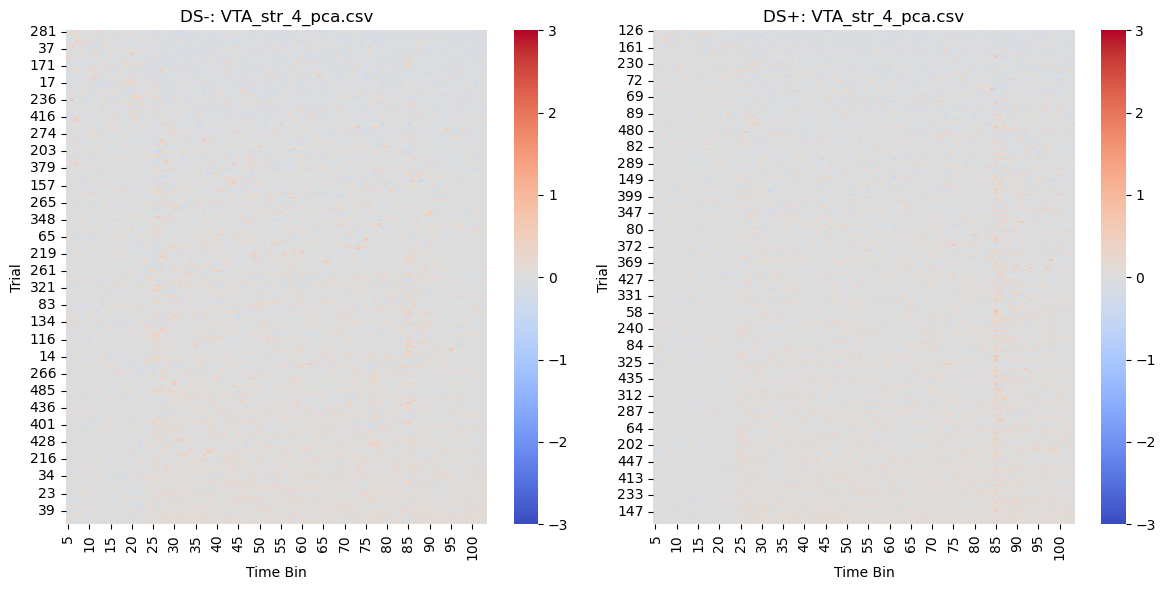

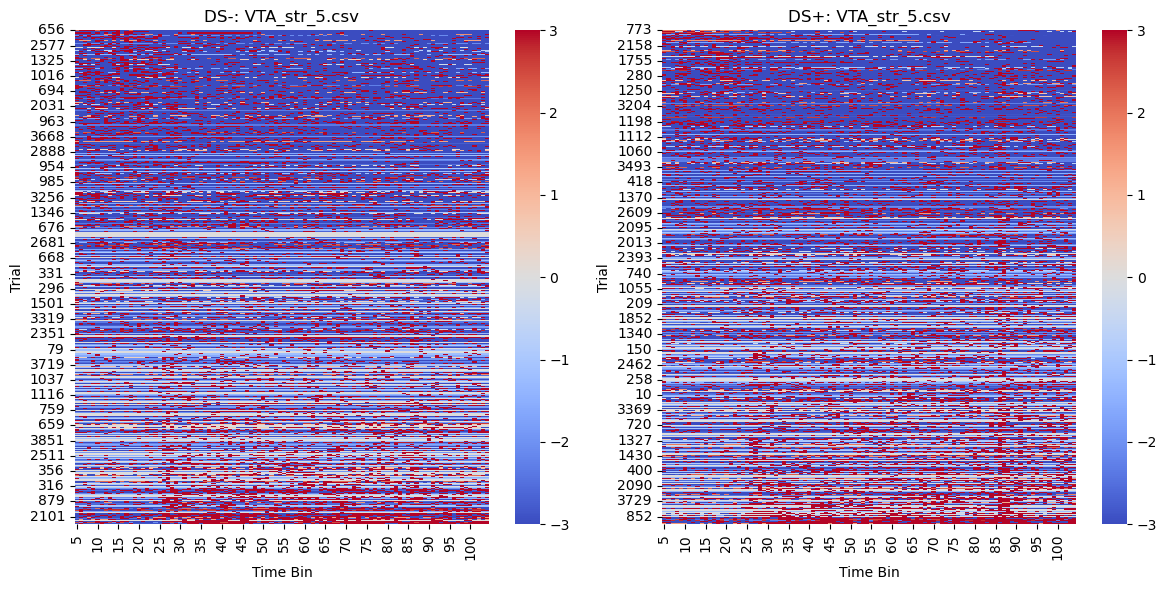

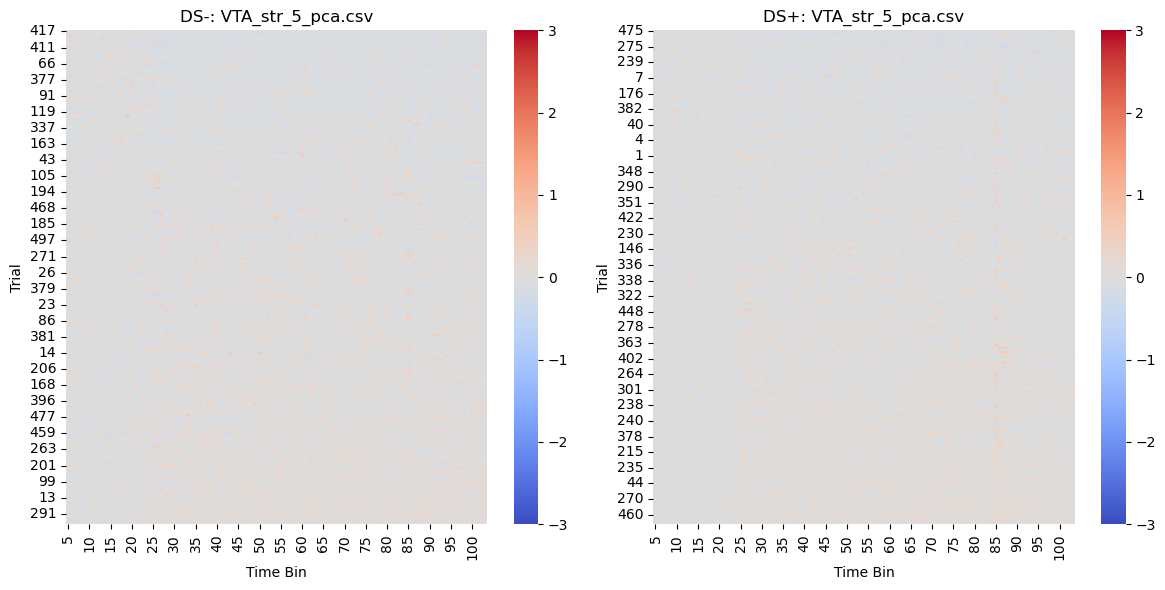

In [6]:
import seaborn as sns

# Process each file
for file in csv_files:
    df = pd.read_csv(file, header=None)  # Assuming no headers in CSV

    # Split into DS- and DS+
    ds_minus = df[df.iloc[:, 3] == 0].iloc[:, 5:105]  # Extract z-score columns
    ds_plus = df[df.iloc[:, 3] == 1].iloc[:, 5:105]

    # Sort the trials by z-score
    ds_minus = ds_minus.iloc[np.argsort(ds_minus.mean(axis=1))]
    ds_plus = ds_plus.iloc[np.argsort(ds_plus.mean(axis=1))]

    # Create heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # DS- heatmap
    sns.heatmap(ds_minus, vmin=-3, vmax=3, cmap="coolwarm", center=0, ax=axes[0])
    axes[0].set_title(f"DS-: {os.path.basename(file)}")
    axes[0].set_xlabel("Time Bin")
    axes[0].set_ylabel("Trial")

    # DS+ heatmap
    sns.heatmap(ds_plus, vmin=-3, vmax=3, cmap="coolwarm", center=0, ax=axes[1])
    axes[1].set_title(f"DS+: {os.path.basename(file)}")
    axes[1].set_xlabel("Time Bin")
    axes[1].set_ylabel("Trial")

    plt.tight_layout()
    plt.show()

In [8]:
import os
import pandas as pd

# Important files (PFC_con_4, PFC_con_5)
imp_files = ["PFC_con_4.csv", "PFC_con_5.csv"]
imp_files_pca = ["PFC_con_4_pca.csv", "PFC_con_5_pca.csv"]
# Reload into dfs
dfs = [pd.read_csv(os.path.join("./Neuron Data", f)) for f in imp_files]
dfs_pca = [pd.read_csv(os.path.join("./Neuron Data", f)) for f in imp_files_pca]

In [ ]:
max_vals_pca = [df.iloc[:, 4:].max().tolist() for df in dfs_pca]
min_vals_pca = [df.iloc[:, 4:].min().tolist() for df in dfs_pca]

max_vals = [df.iloc[:, 4:].max().tolist() for df in dfs]
min_vals = [df.iloc[:, 4:].min().tolist() for df in dfs]

print(f'{max(max_vals_pca[0])} {min(min_vals_pca[0])}, {max(max_vals_pca[1])} {min(min_vals_pca[1])}')
print(f'{max(max_vals[0])} {min(min_vals[0])}, {max(max_vals[1])} {min(min_vals[1])}')

0.852804994155601 -0.3667061019324381, 0.8501181310782646 -0.3950704506956214
134.81643704724289 -32.25374679800016, 137.89085861248705 -30.458732327528026
